# **TP INTEGRADOR - **

Al ejecutar el colab se:


- Obtiene la biografía de Leonardo da Vinci: Descarga el contenido HTML de una página web que contiene la biografía.
- Limpia y preprocesa el texto: Elimina caracteres especiales, convierte a minúsculas y realiza la lematización (obtiene la raíz de las palabras) para facilitar el análisis.
- Realiza análisis de frecuencia: Cuenta la frecuencia de cada palabra en el texto y crea una lista de las palabras más comunes.
- Visualiza los resultados: Genera una nube de palabras para visualizar las palabras más frecuentes y crea un DataFrame con información morfológica de las palabras (categoría gramatical, etiqueta, etc.). También visualiza las entidades nombradas (personas, lugares, organizaciones, etc.) y las dependencias sintácticas entre las palabras.

In [1]:
# Instalar las bibliotecas necesarias

!pip install requests beautifulsoup4 nltk wordcloud spacy
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 98.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
# Importar las bibliotecas

import requests
import pandas as pd
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import spacy
from spacy import displacy

# 1. Obtener el texto de la biografía

In [3]:
# Definir la URL de la biografía

url = "https://www.biografiasyvidas.com/monografia/leonardo/"

# Obtener la página web

response = requests.get(url)

# Crear un objeto BeautifulSoup para analizar el HTML

soup = BeautifulSoup(response.text, 'html.parser')

# Extraer el texto de los párrafos

text = ""
for parrafo in soup.find_all("p"):
    text += str(parrafo.getText())

In [4]:
print(text)

Considerado el paradigma del homo universalis, del sabio renacentista versado en todos los ámbitos del conocimiento humano, Leonardo da Vinci (1452-1519) 
incursionó en campos tan variados como la aerodinámica, la hidráulica, la anatomía, la botánica, la pintura,
la escultura y la arquitectura, entre otros. Sus investigaciones científicas fueron, en gran medida, olvidadas y minusvaloradas por sus contemporáneos;
su producción pictórica, en cambio, fue de inmediato reconocida como la de un maestro capaz de materializar el ideal de belleza en obras
de turbadora sugestión y delicada poesía.
Recreación de un retrato de LeonardoEn el plano artístico, Leonardo conforma, junto con Miguel Ángel y Rafael,
la tríada de los grandes maestros del Cinquecento, y,
pese a la parquedad de su obra, la historia de la pintura lo cuenta entre sus mayores genios. Por los demás, es posible que de la poderosa fascinación
que suscitan sus obras maestras (con La Gioconda a la cabeza) proceda aquella otra fascin

# 2. Limpiar el texto

In [5]:
# Eliminar una subcadena específica si existe

substring_a_borrar = ", los sacramentos."
index = text.find(substring_a_borrar)
if index != -1:
    text = text[:index + len(substring_a_borrar)]

In [6]:
print(text)

Considerado el paradigma del homo universalis, del sabio renacentista versado en todos los ámbitos del conocimiento humano, Leonardo da Vinci (1452-1519) 
incursionó en campos tan variados como la aerodinámica, la hidráulica, la anatomía, la botánica, la pintura,
la escultura y la arquitectura, entre otros. Sus investigaciones científicas fueron, en gran medida, olvidadas y minusvaloradas por sus contemporáneos;
su producción pictórica, en cambio, fue de inmediato reconocida como la de un maestro capaz de materializar el ideal de belleza en obras
de turbadora sugestión y delicada poesía.
Recreación de un retrato de LeonardoEn el plano artístico, Leonardo conforma, junto con Miguel Ángel y Rafael,
la tríada de los grandes maestros del Cinquecento, y,
pese a la parquedad de su obra, la historia de la pintura lo cuenta entre sus mayores genios. Por los demás, es posible que de la poderosa fascinación
que suscitan sus obras maestras (con La Gioconda a la cabeza) proceda aquella otra fascin

# 3. Preprocesamiento del texto

In [7]:
# Convertir a minúsculas, eliminar caracteres especiales y espacios adicionales

text = text.lower()
text = re.sub(r'[^\w\s]', '', text)
text = re.sub(r'\s+', ' ', text)

In [8]:
print(text)

considerado el paradigma del homo universalis del sabio renacentista versado en todos los ámbitos del conocimiento humano leonardo da vinci 14521519 incursionó en campos tan variados como la aerodinámica la hidráulica la anatomía la botánica la pintura la escultura y la arquitectura entre otros sus investigaciones científicas fueron en gran medida olvidadas y minusvaloradas por sus contemporáneos su producción pictórica en cambio fue de inmediato reconocida como la de un maestro capaz de materializar el ideal de belleza en obras de turbadora sugestión y delicada poesía recreación de un retrato de leonardoen el plano artístico leonardo conforma junto con miguel ángel y rafael la tríada de los grandes maestros del cinquecento y pese a la parquedad de su obra la historia de la pintura lo cuenta entre sus mayores genios por los demás es posible que de la poderosa fascinación que suscitan sus obras maestras con la gioconda a la cabeza proceda aquella otra fascinación en torno a su figura qu

# 4. Lematización con spaCy

In [9]:
# Cargar el modelo en español de spaCy

nlp = spacy.load('es_core_news_sm')

# Descargar las stop words en español

nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

# Procesar el texto con spaCy

doc = nlp(text)

# Obtener los lemas, excluyendo stop words y tokens no alfabéticos

lemmas = [token.lemma_ for token in doc if token.lemma_ not in stop_words and token.is_alpha]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
print(lemmas)

['considerar', 'paradigma', 'homo', 'universali', 'sabio', 'renacentista', 'versado', 'ámbito', 'conocimiento', 'humano', 'leonardo', 'dar', 'vinci', 'incursionar', 'campo', 'variado', 'aerodinámico', 'hidráulico', 'anatomía', 'botánica', 'pintura', 'escultura', 'arquitectura', 'investigación', 'científico', 'ser', 'gran', 'medida', 'olvidada', 'minusvalorada', 'contemporáneo', 'producción', 'pictórico', 'cambio', 'ser', 'inmediato', 'reconocido', 'maestro', 'capaz', 'materializar', 'ideal', 'belleza', 'obra', 'turbadora', 'sugestión', 'delicado', 'poesía', 'recreación', 'retrato', 'leonardoen', 'plano', 'artístico', 'leonardo', 'conformar', 'junto', 'miguel', 'ángel', 'rafael', 'tríada', 'grande', 'maestro', 'cinquecento', 'pese', 'parquedad', 'obra', 'historia', 'pintura', 'contar', 'mayor', 'genio', 'demá', 'ser', 'posible', 'poderoso', 'fascinación', 'suscitar', 'obra', 'maestro', 'gioconda', 'cabeza', 'proceder', 'aquel', 'fascinación', 'torno', 'figura', 'haber', 'cesar', 'crecer

# 5. Análisis de frecuencia de palabras

In [11]:
# Unir los lemas en un texto

lemmatized_text = " ".join(lemmas)

# Crear un vectorizador de conteo

vectorizer = CountVectorizer()

# Ajustar y transformar el texto lematizado

X = vectorizer.fit_transform([lemmatized_text])

# Obtener las palabras y sus cantidades

palabras = vectorizer.get_feature_names_out()
cantidad = X.toarray().flatten()

# Crear un DataFrame con las palabras y sus frecuencias

df = pd.DataFrame({'Palabra': palabras, 'Cantidad': cantidad}).sort_values(by = 'Cantidad', ascending = False).reset_index(drop = True)

# Obtener las 20 palabras más comunes usando Counter

counter = Counter(lemmas)
most_common = counter.most_common(20)

In [12]:
print(df)
print(most_common)

       Palabra  Cantidad
0     leonardo        43
1          ser        31
2        haber        14
3         gran        12
4      pintura        12
...        ...       ...
1026     vista         1
1027     vital         1
1028     vivir         1
1029     volar         1
1030   acabado         1

[1031 rows x 2 columns]
[('leonardo', 43), ('ser', 31), ('haber', 14), ('pintura', 12), ('gran', 12), ('año', 11), ('último', 10), ('obra', 9), ('hacer', 9), ('entonces', 8), ('nuevo', 8), ('maestro', 7), ('sólo', 7), ('san', 7), ('milán', 7), ('grande', 6), ('alguno', 6), ('florencia', 6), ('poder', 6), ('además', 6)]


# 6. Visualización de la nube de palabras

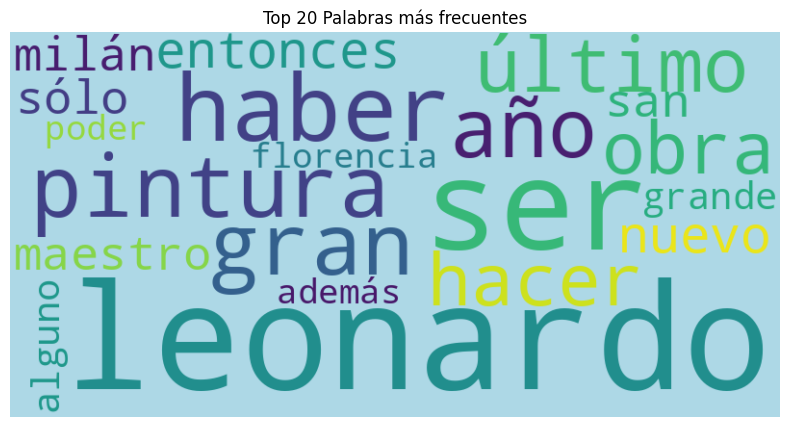

In [13]:
# Crear y mostrar la nube de palabras

wordcloud = WordCloud(width=800, height=400, background_color='lightblue').generate_from_frequencies(dict(most_common))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Top 20 Palabras más frecuentes")
plt.show()

# 7. Creación del DataFrame con información morfológica

In [14]:
# Crear una lista de diccionarios con información de cada token

tokens_data = []

for token in doc:
    if not token.is_space:
        tokens_data.append({
            "Token": token.text,
            "Lema": token.lemma_,
            "Categoría Gramatical": spacy.explain(token.pos_),
            "Etiqueta": token.tag_,
            "Dependencia": spacy.explain(token.dep_),
            "Cabeza": token.head.text
        })
# Crear un DataFrame a partir de la lista de diccionarios

df_token = pd.DataFrame(tokens_data)

# Mostrar todas las filas del DataFrame

pd.options.display.max_rows = None
df_token

/usr/local/lib/python3.11/dist-packages/spacy/glossary.py:20: UserWarning: [W118] Term 'expl:pv' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))
/usr/local/lib/python3.11/dist-packages/spacy/glossary.py:20: UserWarning: [W118] Term 'expl:pass' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))
/usr/local/lib/python3.11/dist-packages/spacy/glossary.py:20: UserWarning: [W118] Term 'expl:impers' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))


Token                 Lema       Categoría Gramatical  \
0             considerado           considerar                       verb   
1                      el                   el                 determiner   
2               paradigma            paradigma                       noun   
3                     del                  del                 adposition   
4                    homo                 homo                    numeral   
5             universalis           universali                       noun   
6                     del                  del                 adposition   
7                   sabio                sabio                       noun   
8            renacentista         renacentista                       noun   
9                 versado              versado                  adjective   
10                     en                   en                 adposition   
11                  todos                 todo                 determiner   
12                    los                   el                 determiner   
13                ámbitos               ámbito                       noun   
14                    del                  del                 adposition   
15           conocimiento         conocimiento                       noun   
16                 humano               humano                  adjective   
17               leonardo             leonardo                proper noun   
18                     da                  dar                       verb   
19                  vinci                vinci                proper noun   
20               14521519             14521519                    numeral   
21             incursionó          incursionar                       verb   
22                     en                   en                 adposition   
23                 campos                campo                       noun   
24                    tan                tanto                     adverb   
25               variados              variado                  adjective   
26                   como                 como  subordinating conjunction   
27                     la                   el                 determiner   
28           aerodinámica         aerodinámico                  adjective   
29                     la                   el                 determiner   
30             hidráulica           hidráulico                  adjective   
31                     la                   el                 determiner   
32               anatomía             anatomía                       noun   
33                     la                   el                 determiner   
34               botánica             botánica                       noun   
35                     la                   el                 determiner   
36                pintura              pintura                       noun   
37                     la                   el                 determiner   
38              escultura            escultura                       noun   
39                      y                    y   coordinating conjunction   
40                     la                   el                 determiner   
41           arquitectura         arquitectura                       noun   
42                  entre                entre                 adposition   
43                  otros                 otro                    pronoun   
44                    sus                   su                 determiner   
45        investigaciones        investigación                       noun   
46            científicas           científico                  adjective   
47                 fueron                  ser                  auxiliary   
48                     en                   en                 adposition   
49                   gran                 gran                  adjective   
50                 medida               medida                       noun   
51              

# 8. Visualización de entidades

In [15]:
# Visualizar las entidades nombradas en el texto

displacy.render(doc, style='ent', jupyter=True, options={'compact': True, 'distance': 100})

# 9. Visualización de dependencias

In [16]:
displacy.render(doc, style='dep', jupyter=True, options={'distance': 200, 'color': 'blue', 'bg': 'white', 'font': 'Arial'})